In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [8]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [15]:
# Define the feedforward neural network model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(32, activation='leaky_relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0576 - accuracy: 0.2415 - val_loss: 1.8558 - val_accuracy: 0.3359
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8955 - accuracy: 0.3115 - val_loss: 1.7921 - val_accuracy: 0.3638
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8341 - accuracy: 0.3346 - val_loss: 1.7143 - val_accuracy: 0.3957
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7912 - accuracy: 0.3561 - val_loss: 1.6600 - val_accuracy: 0.4042
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7656 - accuracy: 0.3645 - val_loss: 1.6584 - val_accuracy: 0.4191
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7397 - accuracy: 0.3752 - val_loss: 1.6298 - val_accuracy: 0.4226
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7199 - accuracy: 0.3847 - val_loss: 1.6060 - val_accuracy:

In [30]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

# Calculate F1 Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f'F1 Score: {f1:.3f}')

313/313 [==============================] - 1s 2ms/step - loss: 1.4802 - accuracy: 0.4682
Test accuracy: 0.4681999981403351
F1 Score: 0.469


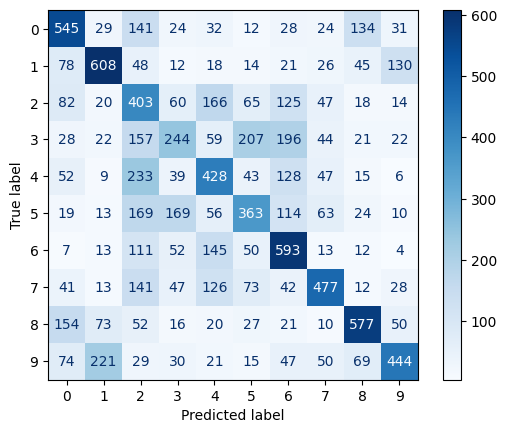

In [25]:
# Compute and display the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

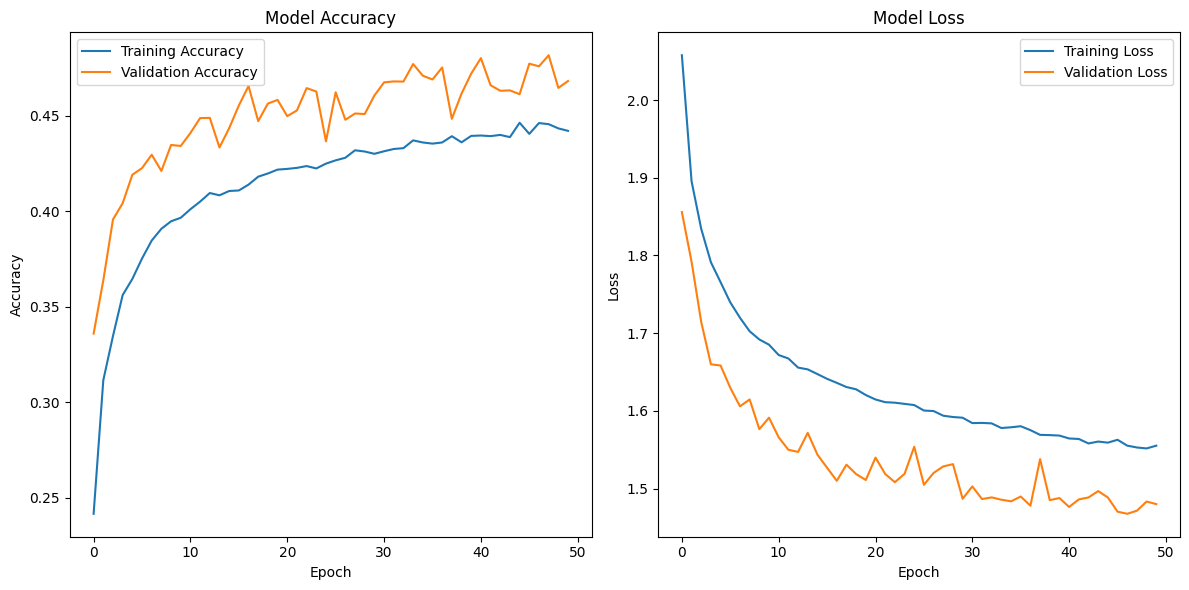

In [31]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()